In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=a8d35b0fcbfa5c65dbd39a3e30080957&units=metric&q='

In [5]:
a = requests.get(query_url+"Oslo").json()
a

{'coord': {'lon': 10.7461, 'lat': 59.9127},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': -1.72,
  'feels_like': -5.2,
  'temp_min': -2.22,
  'temp_max': -0.56,
  'pressure': 1020,
  'humidity': 47},
 'visibility': 10000,
 'wind': {'speed': 0.45, 'deg': 113, 'gust': 1.34},
 'snow': {'1h': 0.11},
 'clouds': {'all': 19},
 'dt': 1614904003,
 'sys': {'type': 3,
  'id': 2003579,
  'country': 'NO',
  'sunrise': 1614924215,
  'sunset': 1614963223},
 'timezone': 3600,
 'id': 3143244,
 'name': 'Oslo',
 'cod': 200}

In [9]:
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for cities in cities:
    response = requests.get(query_url+cities).json()
    lat.append(response["coord"]["lat"])
    temp.append(response["main"]["temp"])
    
print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075, 19.0144, 14.6042, 40.7143, 47.6062, 32.7668, 25.0478]
The temperature information received is: [6.15, 4.19, -1.56, 7.64, 25, 28.48, 0.77, 8.58, 20.32, 19.63]


In [11]:
# create a data frame from cities, lat, and temp
weather_dict = {"Latitude" : lat,
                "Temperature" : temp}
weather_data = pd.DataFrame(weather_dict)
weather_data

,Latitude,Temperature
0,48.8534,6.15
1,51.5085,4.19
2,59.9127,-1.56
3,39.9075,7.64
4,19.0144,25.00
5,14.6042,28.48
6,40.7143,0.77
7,47.6062,8.58
8,32.7668,20.32
9,25.0478,19.63


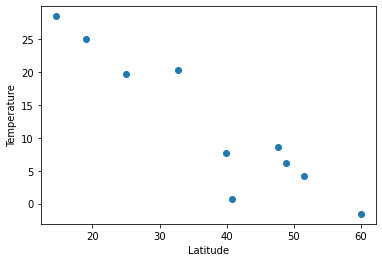

In [12]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['Latitude']
y_values = weather_data['Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [13]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)

# Get regression values
regress_values = slope * x_values + intercept
print(regress_values)

0     4.745343
1     2.991222
2    -2.561103
3    10.655548
4    24.458800
5    27.372446
6    10.122527
7     5.569319
8    15.373129
9    20.472769
Name: Latitude, dtype: float64


In [14]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.66x +37.02


The r-value is: 0.8637868722594936


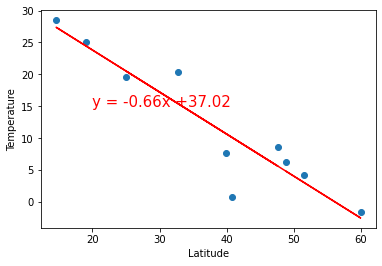

In [17]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [18]:
# Calculate the temperature for Florence at 43.77 degrees
florence_lat = 43.77
florence_predicted_temp = slope * florence_lat + intercept
                                
print(f"The Predicted temperature for Florence will be {florence_predicted_temp}.")

The Predicted temperature for Florence will be 8.10374576677119.


In [20]:
# Use API to determine actual temperature
response = requests.get(query_url+"Florence").json()
florence_actual_temp = response["main"]["temp"]

print(f"The actual temperature of Florence is {florence_actual_temp}")

The actual temperature of Florence is 8.71
